In [1]:
import scipy.io
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os

In [2]:
print(os.getcwd())
os.chdir("..")
main_dir = os.getcwd() 
main_data_dir =  "/media/mountHDD2"
print(os.listdir(main_dir))

/media/mountHDD2/linh/git/HeartResearch/Chapman Dataset/Data_Explore
['Data_Explore', 'Diagnostics.xlsx', '.ipynb_checkpoints', '2D_model', '1D_Model', '2D_Loss']


In [3]:
data_dir_45 = main_data_dir + "/ECGDataDenoised"
label_file = main_dir + "/Diagnostics.xlsx"

In [4]:
data_df = pd.read_csv(data_dir_45 + "/MUSE_20180209_121900_35000.csv", header = None)
label_df = pd.read_excel(label_file)
label_df = label_df[['FileName', 'Rhythm']]

In [5]:
label_df.shape

(10646, 2)

In [6]:
print(label_df)

                         FileName Rhythm
0      MUSE_20180120_121711_19000     SA
1      MUSE_20180120_121704_86000     SA
2      MUSE_20180113_125357_13000     SA
3      MUSE_20180113_134825_04000     SB
4      MUSE_20180115_123455_79000     SB
...                           ...    ...
10641  MUSE_20181222_204246_47000    SVT
10642  MUSE_20180115_120332_79000     SA
10643  MUSE_20180712_152507_30000     AF
10644  MUSE_20180118_181350_17000     SA
10645  MUSE_20180116_121646_28000     ST

[10646 rows x 2 columns]


In [7]:
data_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,49.133,61.211,6.7647,-53.822,12.169,41.707,36.713,106.81,106.290,100.370,41.429,78.141
1,53.844,67.199,8.2796,-60.076,14.350,44.977,38.227,106.72,106.090,99.129,44.492,81.059
2,58.234,72.618,9.5449,-65.685,16.438,47.840,40.240,106.45,105.800,97.971,47.131,83.570
3,62.223,77.106,10.2790,-70.287,18.493,49.983,42.918,106.05,105.550,97.157,49.222,85.496
4,66.146,80.723,10.2060,-74.030,20.816,51.318,45.883,105.75,105.620,97.085,51.001,86.947
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,66.517,46.546,-11.8740,-56.454,34.361,15.131,-21.945,126.45,96.536,134.020,1184.500,94.408
4996,75.808,51.847,-15.8850,-63.682,41.002,16.090,-23.573,130.09,73.827,140.160,1193.900,98.023
4997,85.068,58.026,-18.9890,-71.638,47.391,17.946,-24.573,134.78,59.682,147.040,1202.900,99.660
4998,93.443,64.698,-20.7140,-79.696,52.901,20.743,-24.774,141.01,54.285,154.780,1212.100,99.929


In [8]:
array = data_df.values.T
print(array)
print(array.shape)

[[  49.133    53.844    58.234  ...   85.068    93.443   100.96  ]
 [  61.211    67.199    72.618  ...   58.026    64.698    71.547 ]
 [   6.7647    8.2796    9.5449 ...  -18.989   -20.714   -21.402 ]
 ...
 [ 100.37     99.129    97.971  ...  147.04    154.78    163.18  ]
 [  41.429    44.492    47.131  ... 1202.9    1212.1    1221.7   ]
 [  78.141    81.059    83.57   ...   99.66     99.929    99.653 ]]
(12, 5000)


591.73
950.34


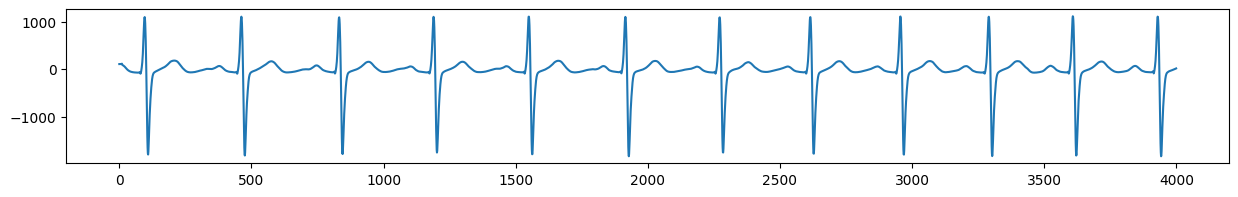

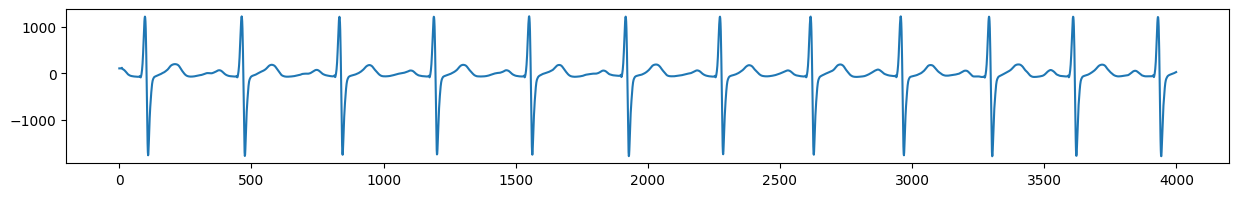

In [17]:
def plots(i):
    plt.figure(figsize = (15,2))
    plt.plot(array[i][:4000])

for i in range(7,9):
    if i % 1 ==0:
        print(array[i][100])
        plots(i)

In [11]:
clip_data = array[:, 500:3000]
print(clip_data)
print(clip_data.shape)

[[-25.21  -24.454 -23.956 ... -33.912 -34.002 -34.152]
 [-13.491 -13.634 -13.866 ... -37.281 -37.663 -37.89 ]
 [ 26.816  25.443  24.326 ...  11.855  11.697  11.7  ]
 ...
 [-65.937 -63.111 -60.854 ... -59.356 -57.939 -56.604]
 [-75.807 -72.79  -70.342 ... -66.931 -65.499 -64.099]
 [-38.527 -37.49  -36.667 ... -37.371 -37.172 -36.942]]
(12, 2500)


In [9]:
type(x)

NameError: name 'x' is not defined

In [ ]:
x

In [ ]:
x.shape

In [ ]:
a = x[0][0]

In [ ]:
type(a)

In [ ]:
a[0]

In [ ]:
a

In [ ]:
a[2].shape


In [ ]:
print(len(a[2][1]))

In [ ]:
def plots(i):
    plt.figure(figsize = (15,2))
    plt.plot(a[2][i][:4500])

for i in range(12):
    if i % 1 ==0:
        plots(i)
# save_dir =         
# plt.savefig()


In [ ]:
## Grayscale
data = scipy.io.loadmat("/media/mountHDD2/khoibaocon/alldata/A0011.mat")['ECG'][0][0][2]
clip_data = data[:, 500:2500]
clip_data = torch.tensor(clip_data, dtype=torch.float32)
normalized_data = (clip_data - clip_data.min()) / (clip_data.max() - clip_data.min())
grayscale_images = (normalized_data * 255)
grayscale_images = grayscale_images.unsqueeze(0).unsqueeze(0) # (1, 1, h, w)
resized_images = F.interpolate(grayscale_images, size=(12*4,2500), mode='bilinear', align_corners=True)
resized_images = resized_images.squeeze(0).squeeze(0)
print(resized_images.shape)
torch_data = resized_images.unsqueeze(0).repeat(3, 1, 1)
plt.figure(figsize=(25, 25))
plt.imshow(resized_images, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
fig, axs = plt.subplots(5, 1)
axs[0].plot(a[2][2][500:3000], 'tab:blue')
axs[0].set_title('Lead III',x=1.075,y = 0.25)
axs[1].plot(a[2][3][500:3000], 'tab:blue')
axs[1].set_title('Lead aVR',x=1.095,y = 0.25)
axs[2].plot(a[2][4][500:3000], 'tab:blue')
axs[2].set_title('Lead aVL',x=1.09,y = 0.25)
axs[3].plot(a[2][9][500:3000]/10, 'tab:blue')
axs[3].set_title('Lead V3',x=1.08,y = 0.25)
axs[4].plot(a[2][11][500:3000]/10, 'tab:blue')
axs[4].set_title('Lead V6',x=1.08,y = 0.25)
axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[3].axes.get_xaxis().set_ticks([])
axs[4].axes.get_xaxis().set_ticks([])
plt.tight_layout(pad = 3, h_pad = 1, w_pad = 1)
bbox_inches='tight'
plt.savefig("/home/thaobeo/git/HeartResearch/ECGsig.pdf", format = 'pdf', dpi = 300)